In [103]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt

In [104]:
# Creamos una matriz bidimensional que representa una funcion
data = np.array([[1,2], [2,3], [3,4], [4,5], [5,6]])
x = data[:,0]
y= data[:,1]

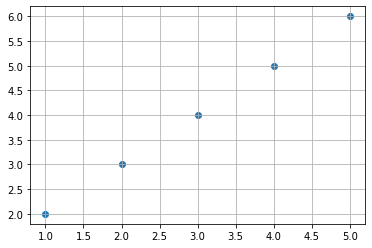

In [105]:
# Visualizar la funcion
plt.scatter(x,y)
plt.grid(True)
plt.show()

In [106]:
# Creamos una instancia de la clase CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=1)

In [107]:
# Una vez que hemos creado la instancia, podemos utilizarlo para extraer una bolsa de palabras
content = ["How to format my hard disk", " Hard disk format problems "]
X = vectorizer.fit_transform(content)

In [108]:
# fit_trasnform ha extraido siete caracteristicas de los dos "documentos"
# Para ver eso usamos get_feature_names
vectorizer.get_feature_names()

['disk', 'format', 'hard', 'how', 'my', 'problems', 'to']

In [109]:
# Se puede ver cuántas veces cada una de estas siete features se produce en los dos documentos haciendo
X.toarray()
# Esto genera una fila por cada "documento".
# Cada elemento especifica el numero de veces que una determianda feature se produjo en ese documento

array([[1, 1, 1, 1, 1, 0, 1],
       [1, 1, 1, 0, 0, 1, 0]], dtype=int64)

In [110]:
X.toarray()[0]
# Nos da el vector de el primer documento ("How to format my hard disk")
# Donde podemos ver que el feature 'problems' no ocurre

array([1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [111]:
X.toarray()[1,2]
# Esto nos devuelve dentro de el primer documento, las ocurrencias del tercer feature ("hard")

1

In [112]:
# Cargamos el dataset de "20 Newsgroups"
from sklearn.datasets import fetch_20newsgroups

In [113]:
# Para simplificar, vamos a utilizar un subconjunto del dataset que solo pertenecen a estas categorias
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics',
'sci.med']

In [114]:
# Importamos los documentos pertenecientes a las categorias
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

In [115]:
# Creamos un nuevo CountVectorizer
vectorizer = CountVectorizer()

In [116]:
# Vectorizamos igual que en el ejemplo anterior
train_counts = vectorizer.fit_transform(twenty_train.data)

In [117]:
vectorizer.vocabulary_.get('algorithm')
# Esto nos da la frecuencia de la palabra "algorithm" en el subconjunto de la coleccion

4690

In [118]:
len(vectorizer.get_feature_names())
# Muestra cuantos terminos fueron ectraidos

35788

In [119]:
vectorizer = CountVectorizer(stop_words='english')
# Esto elimina las stopwords


In [120]:
sorted(vectorizer.get_stop_words())[:20]
# Esto muestra que palabras son stopwords

['a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amoungst']

In [121]:
import nltk

In [122]:
# Creamos un steammer de ingles
s = nltk.stem.SnowballStemmer('english')


In [123]:
# Se puede utilizar para llevar a la raiz (steam) palabras
s.stem("cats")
s.stem("loving")

'love'

In [124]:
from nltk.tokenize import word_tokenize

text = word_tokenize("And now for something completely different")

In [125]:
# Producir una version tokenizada de la frase, que luego puede ser alimentada por el etiquetador POS
nltk.pos_tag(text)

[('And', 'CC'),
 ('now', 'RB'),
 ('for', 'IN'),
 ('something', 'NN'),
 ('completely', 'RB'),
 ('different', 'JJ')]

In [126]:
# build_analyzer toma un string como entrada y como salida una lista de tokens
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
analyze = vectorizer.build_analyzer()
analyze("John bought carrots and potatoes")

['john', 'bought', 'carrots', 'potatoes']

In [127]:
# Si modificamos build_analyzer para aplicar el steammer de NLTK a la salida del metodo build_analyzer, obtenemos esto
import nltk.stem
english_stemmer = nltk.stem.SnowballStemmer('english')
class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: (english_stemmer.stem(w) for w in analyzer(doc))

In [128]:
# Creamos una instancia de la clase
stem_vectorizer = StemmedCountVectorizer(min_df=1, stop_words='english')
stem_analyze = stem_vectorizer.build_analyzer()

In [129]:
y = stem_analyze("John bought carrots and potatoes")
for tok in y:
    print(tok)

john
bought
carrot
potato


In [130]:
# Si utilizamos este vectorizer en el subconjunto del dataset anterior, vamos a tener menore cantidad de features
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
train_counts = stem_vectorizer.fit_transform(twenty_train.data)
len(stem_vectorizer.get_feature_names())

26888

In [131]:
vectorizerSpanish = CountVectorizer()
from nltk.corpus import stopwords
spanish_stopwords = stopwords.words('spanish')
vectorizerSpanish = CountVectorizer(stop_words=stopwords.words('spanish'))
analyze = vectorizerSpanish.build_analyzer()

In [132]:
analyze("Roberto trajo zanahorias y papas")

['roberto', 'trajo', 'zanahorias', 'papas']

In [133]:
spanish_stemmer=nltk.stem.SnowballStemmer('spanish')

In [134]:
class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer=super(StemmedCountVectorizer,self).build_analyzer()
        return lambda doc: (spanish_stemmer.stem(w) for w in analyzer(doc))
stem_vectorizer = StemmedCountVectorizer(min_df=1, stop_words=stopwords.words('spanish'))
stem_analyze = stem_vectorizer.build_analyzer()

In [135]:
Y = stem_analyze("Roberto trajo zanahorias y papas")
for tok in Y:
    print(tok) 
# Este resultado ocurre debido a que las reglas que toma el stemmer, remueven los sufijos que son atribuidos a acciones (er,as,ia,ir,es,en), terminaciones plurales e incluso generos
# Devolviendo un stem, que seria una palabra sin sufijos.
#La manera de mejorar esto es utilizando Lemmatization, que es mas complejo, buscando la mejor palabra de origen para cada elemento

robert
traj
zanahori
pap
